In [497]:
import pandas as pd
import math
import numpy as np
from random import randint

import matplotlib.pyplot as plt
import matplotlib

In [1097]:
data = pd.read_csv('data_with_features.csv')
data = data.drop('Unnamed: 0', axis=1)

print(data.shape)
data = data[data['avg_spending_previous_weeks']<300]
data = data[data['previous_amount_spent']<500]
data = data[data['SALES_VALUE']<400]

data = data.sort_values('WEEK_NO')

data = data.dropna().reset_index().drop('index',axis=1)

noise = np.random.normal(0,1,data.shape[0])
noise

noise2 = np.random.normal(0,1,data.shape[0])
noise2

noise3 = np.random.normal(0,1,data.shape[0])
noise3

data['combination_feature_prevAmount'] = data['SALES_VALUE']/10 - data['previous_amount_spent'] + 3*noise
data['combination_feature_monday'] = data['SALES_VALUE']/10 *2*data['Monday %'] - 2*noise2
# data['lower_fake'] = data['SALES_VALUE'].apply(lambda x: x if x<50 else randint(30,70))/20 + 10*noise3 + data['previous_amount_spent']
# data['higher_fake'] = data['SALES_VALUE'].apply(lambda x: x if x>50 else randint(30,70))/20 - 10*noise3


print(data.shape)

(123976, 49)
(31712, 51)


In [1098]:
columns_to_predict_on = ['AGE_DESC',
       'MARITAL_STATUS_CODE', 'INCOME_DESC', 'HOMEOWNER_DESC',
       'HOUSEHOLD_SIZE_DESC', 'KID_CATEGORY_DESC', 'Adults', 'Child Boolean',
       'Monday %', 'Tuesday %', 'Wednesday %', ' Thursday %', 'Friday %',
       'Saturday %', 'Sunday %', 'morning %', 'afternoon %', 'evening %',
       'avg_visits_per_month', 'avg_visits_per_week', 'weighted_avg',
       'avg_spending_previous_weeks_real_time',
       'std_spending_previous_weeks_real_time',
       'var_spending_previous_weeks_real_time',
       'quan25_spending_previous_weeks_real_time',
       'quan50_spending_previous_weeks_real_time',
       'quan75_spending_previous_weeks_real_time',
       'avg_spending_previous_weeks', 'std_spending_previous_weeks',
       'var_spending_previous_weeks', 'quan25_spending_previous_weeks',
       'quan50_spending_previous_weeks', 'quan75_spending_previous_weeks',
        'last_shopping_day', 'days_since_last_shopping',
       'last_shopping_week', 'weeks_since_last_shopping',
       'amount_spent_last_week', 'previous_amount_spent', 'month', 'season',
       'month_x', 'month_y', 'combination_feature_prevAmount','combination_feature_monday']


# columns_to_predict_on = ['Monday %', 'Tuesday %', 'Wednesday %',
#        ' Thursday %', 'Friday %', 'Saturday %', 'Sunday %', 'morning %',
#        'afternoon %', 'evening %', 'previous_amount_spent',
#          'weeks_since_last_shopping', 'season', 'month_x', 'month_y',
#        'avg_visits_per_month', 'avg_visits_per_week', 'weighted_avg',
#        'avg_spending_previous_weeks_real_time',
#        'std_spending_previous_weeks_real_time',
#        'var_spending_previous_weeks_real_time',
#        'quan25_spending_previous_weeks_real_time',
#        'quan50_spending_previous_weeks_real_time',
#        'quan75_spending_previous_weeks_real_time',
#        'avg_spending_previous_weeks', 'std_spending_previous_weeks',
#        'var_spending_previous_weeks', 'quan25_spending_previous_weeks',
#        'quan50_spending_previous_weeks', 'quan75_spending_previous_weeks',
#                          'combination_feature_prevAmount','combination_feature_monday']
#                         # 'lower_fake','higher_fake']


In [1099]:
data[columns_to_predict_on].head()

,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,Adults,Child Boolean,Monday %,Tuesday %,...,last_shopping_week,weeks_since_last_shopping,amount_spent_last_week,previous_amount_spent,month,season,month_x,month_y,combination_feature_prevAmount,combination_feature_monday
0,45-54,A,25-34K,Homeowner,5.0,3.0,2.0,1.0,0.103265,0.310681,...,9.0,1.0,247.07,247.07,April,spring,0.865927,0.500171,-238.112991,1.867655
1,35-44,A,35-49K,Homeowner,3.0,1.0,2.0,1.0,0.118333,0.117222,...,9.0,1.0,166.56,166.56,April,spring,0.865927,0.500171,-164.977178,-0.937095
2,35-44,A,125-149K,Homeowner,2.0,0.0,2.0,0.0,0.119642,0.169288,...,9.0,1.0,167.54,167.54,April,spring,0.865927,0.500171,-141.350423,3.876365
3,35-44,A,50-74K,Homeowner,3.0,1.0,2.0,1.0,0.156460,0.199292,...,9.0,1.0,108.44,108.44,April,spring,0.865927,0.500171,-101.052399,-1.593919
4,55-64,U,25-34K,Renter,3.0,1.0,2.0,1.0,0.098173,0.120697,...,9.0,1.0,130.38,130.38,April,spring,0.865927,0.500171,-128.190891,-0.787818


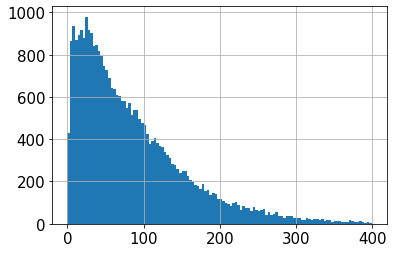

In [1100]:
data['SALES_VALUE'].hist(bins=120)

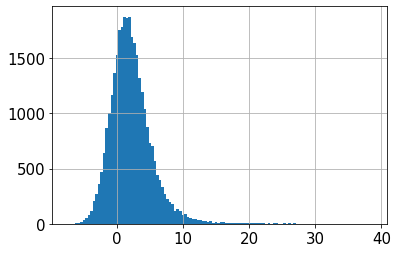

In [1101]:
data['combination_feature_monday'].hist(bins=120)

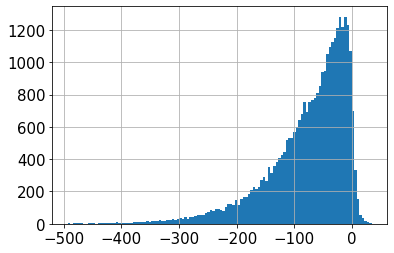

In [1102]:
data['combination_feature_prevAmount'].hist(bins=120)

In [1103]:
X = data[columns_to_predict_on]

y = data['SALES_VALUE']


In [1104]:
X = pd.get_dummies(X)

# option 1
total_data = X.shape[0]
training_amount = int(total_data*0.8)

X_train = X[:training_amount]
y_train = y[:training_amount]
X_test = X[training_amount:]
y_test = y[training_amount:]

#option 2
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

#option 3
# from sklearn.model_selection import GroupShuffleSplit
# train_inds, test_inds = next(GroupShuffleSplit(test_size=.20, n_splits=2, random_state = 10).split(X, groups=data['household_key']))

# X_train = X.iloc[train_inds]
# y_train = y.iloc[train_inds]
# X_test = X.iloc[test_inds]
# y_test = y.iloc[test_inds]


In [1105]:
import xgboost as xgb

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/anaconda3/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [1115]:
param = {'max_depth':5, 'eta':0.7, 'booster':'gbtree', 'subsample':0.5,
         'objective':'reg:squarederror','eval_metric':'rmse'}
evallist = [(dtest, 'eval'), (dtrain, 'train')]
num_round =25
bst = xgb.train(param, dtrain, num_round, evallist)



[0]	eval-rmse:59.8869	train-rmse:55.2477
[1]	eval-rmse:49.1586	train-rmse:45.2159
[2]	eval-rmse:46.8364	train-rmse:43.3356
[3]	eval-rmse:46.5484	train-rmse:42.2681
[4]	eval-rmse:46.1957	train-rmse:41.8683
[5]	eval-rmse:44.9284	train-rmse:40.5888
[6]	eval-rmse:44.9777	train-rmse:40.1977
[7]	eval-rmse:43.9002	train-rmse:39.1854
[8]	eval-rmse:42.4935	train-rmse:37.3421
[9]	eval-rmse:41.9931	train-rmse:36.7171
[10]	eval-rmse:41.4121	train-rmse:36.2079
[11]	eval-rmse:41.1172	train-rmse:35.7412
[12]	eval-rmse:40.742	train-rmse:34.9561
[13]	eval-rmse:40.0749	train-rmse:34.0839
[14]	eval-rmse:39.9025	train-rmse:33.8782
[15]	eval-rmse:39.2069	train-rmse:33.2085
[16]	eval-rmse:38.647	train-rmse:32.2402
[17]	eval-rmse:38.554	train-rmse:31.9989
[18]	eval-rmse:37.977	train-rmse:31.4442
[19]	eval-rmse:38.0935	train-rmse:31.2769
[20]	eval-rmse:37.9629	train-rmse:31.0112
[21]	eval-rmse:37.7374	train-rmse:30.6225
[22]	eval-rmse:37.5452	train-rmse:30.2875
[23]	eval-rmse:37.5423	train-rmse:30.1948
[24]	e

In [1116]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

preds = bst.predict(dtest)
mae = mean_absolute_error(y_test, preds)
print('mean absolute error: ' + str(mae))

mse = mean_squared_error(y_test, preds)
rmse = math.sqrt(mse)
print('mean squared error: ' + str(mse))
print('root mean squared error: ' + str(rmse))

r2 = r2_score(y_test, preds) 
print('R2: ' + str(r2))

mean absolute error: 27.569136353816386
mean squared error: 1400.3437245343455
root mean squared error: 37.42116679814173
R2: 0.7409257106266045


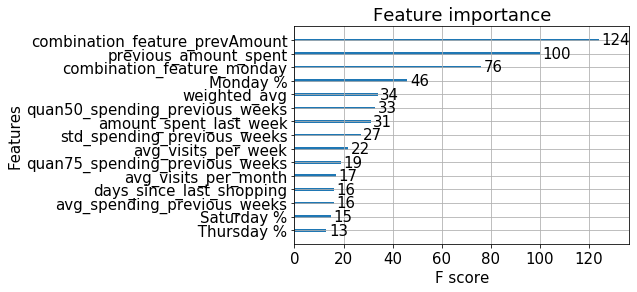

In [1117]:
matplotlib.rcParams.update({'font.size': 15})
xgb.plot_importance(bst,max_num_features=15)

In [1095]:
results.head()

,real,predicted
0,126.43,122.647758
1,31.13,40.097343
2,18.35,27.725397
3,23.76,24.358562
4,56.64,47.426315


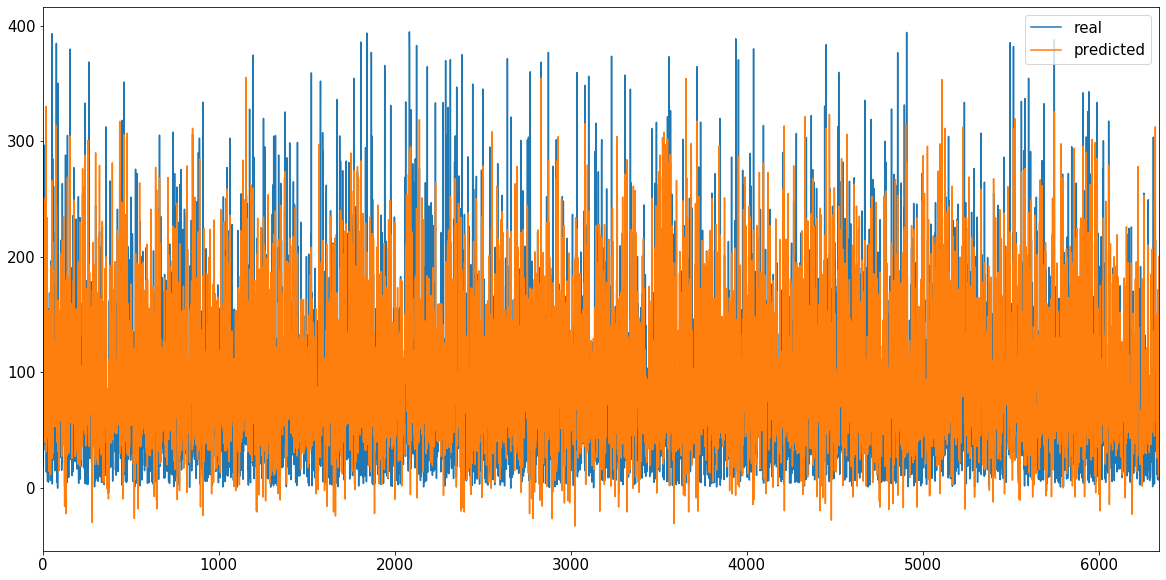

In [1096]:
results = pd.DataFrame({ 'real':y_test, 'predicted':preds})#.sort_values(by='real')
results = results.reset_index().drop('index', axis=1)#.head(1000)
results.plot(figsize=(20,10))

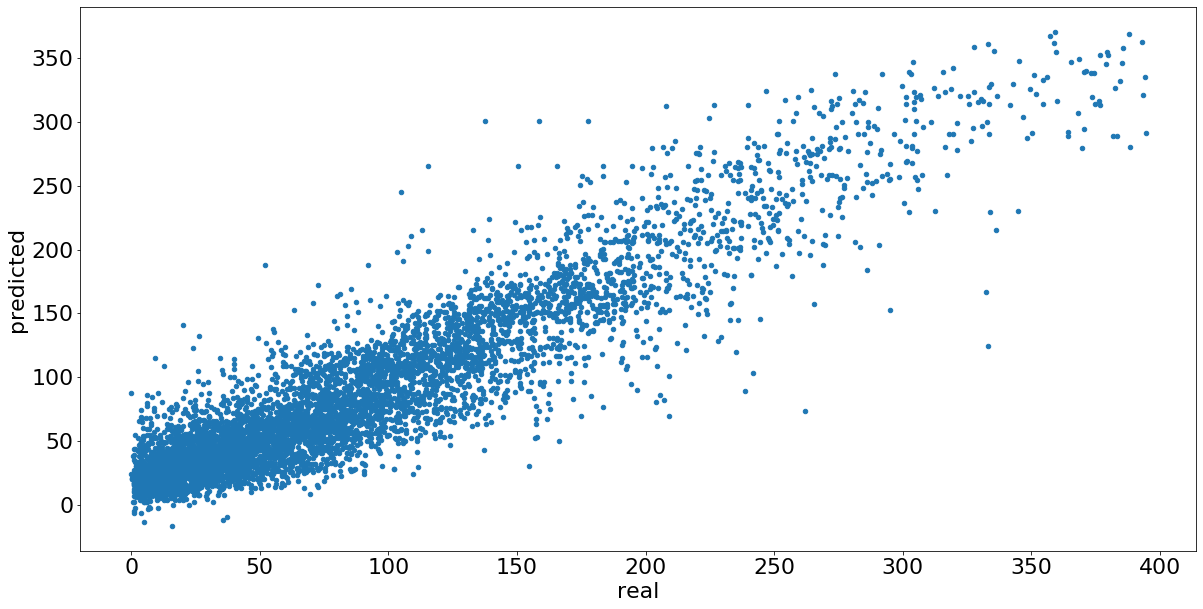

In [947]:
matplotlib.rcParams.update({'font.size': 22})
results.plot(kind='scatter',figsize=(20,10), x='real', y='predicted')

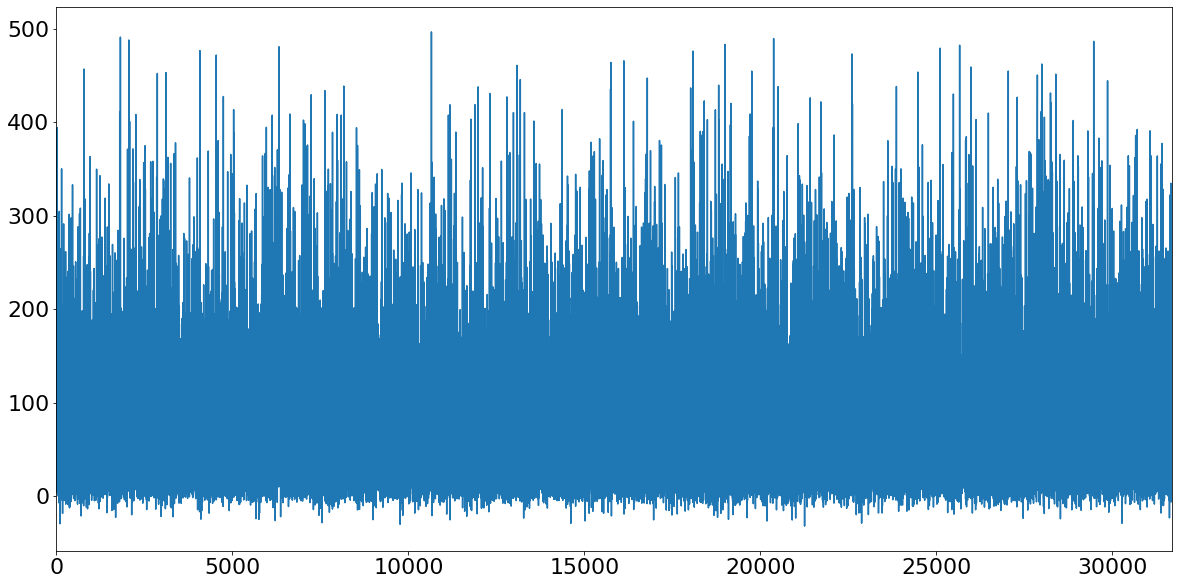

In [950]:
(data['combination_feature_prevAmount']*-1).plot(figsize=(20,10))

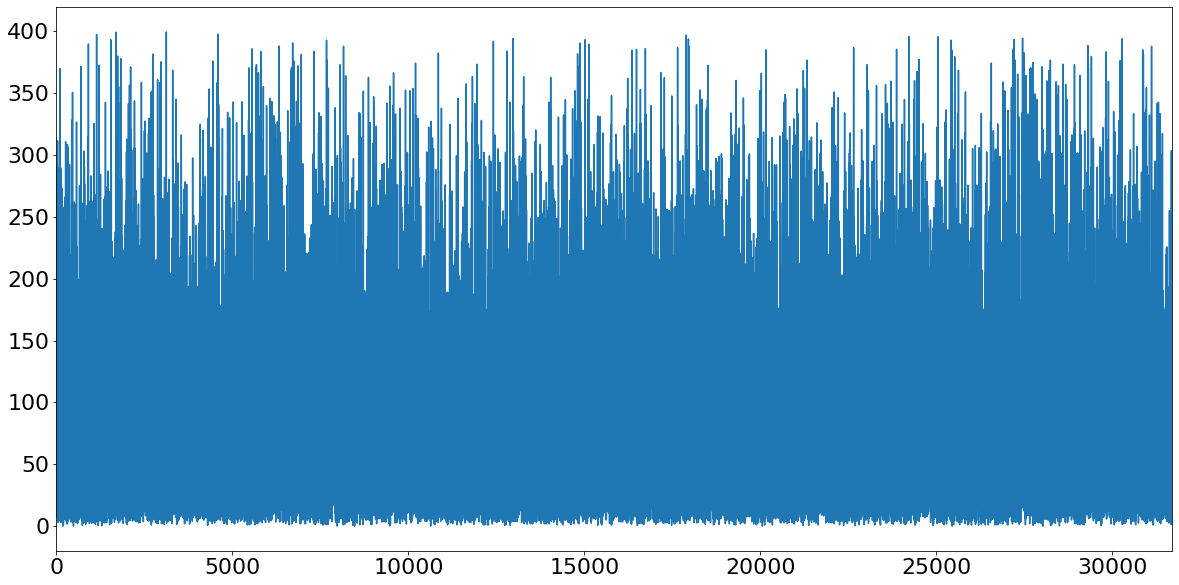

In [951]:
data['SALES_VALUE'].plot(figsize=(20,10))

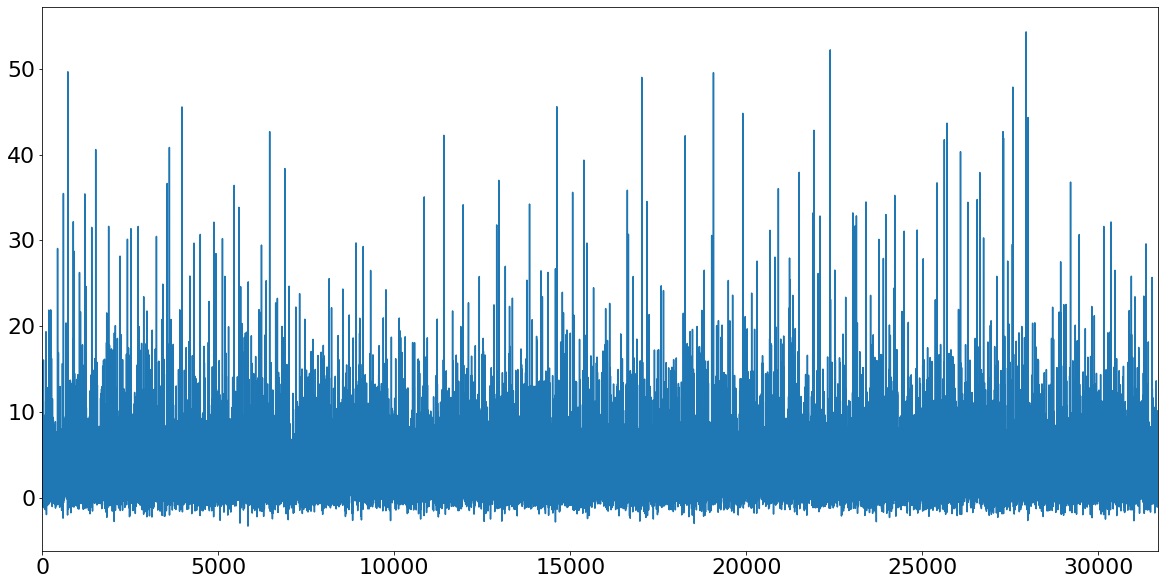

In [952]:
data['combination_feature_monday'].plot(figsize=(20,10))